#Machine Learning Prediction in Tracking Product Delivery

#Import Libraries

In [ ]:
!pip install scikit-learn==0.24.1

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

#Model Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

SEED = 0 

#Loading the Data

In [ ]:
df = pd.read_csv("E-Commerce Shipping Data-c.csv")
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


#Data Pre-processing and Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_Time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# Clean our data
# Look for any missing values
df.isna().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached_on_Time        False
dtype: bool

In [ ]:
# if have empty data
df = df.dropna()

In [ ]:
# Convert the Reached_on_Time column from int64 to object
df['Reached_on_Time']= df['Reached_on_Time'].apply(lambda x : 'Yes' if x == 0 else 'No')


In [ ]:
# Convert the Product Imprtance column from object to int64, Ordinal data
#df['Product_importance']= df['Product_importance'].apply(lambda x : '1' if x == 'low' 
                                                   #else ('2' if x == 'medium'
                                                        #else ('3')))

In [ ]:
# count number of items for each unique numerical feature
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached_on_Time            2
dtype: int64

In [ ]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,No
1,2,F,Flight,4,5,216,2,low,M,59,3088,No
2,3,A,Flight,2,2,183,4,low,M,48,3374,No
3,4,B,Flight,3,3,176,4,medium,M,10,1177,No
4,5,C,Flight,2,2,184,3,medium,F,46,2484,No
5,6,F,Flight,3,1,162,3,medium,F,12,1417,No
6,7,D,Flight,3,4,250,3,low,F,3,2371,No
7,8,F,Flight,4,1,233,2,low,F,48,2804,No
8,9,A,Flight,3,4,150,3,low,F,11,1861,No
9,10,B,Flight,3,2,164,3,medium,F,29,1187,No


###Visualisation

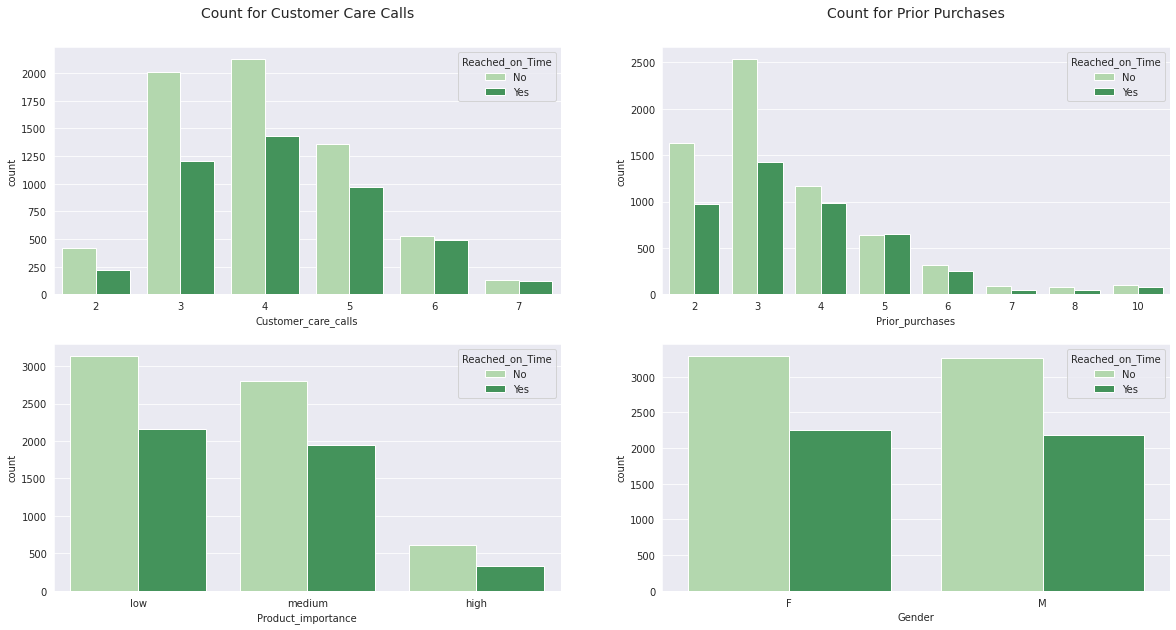

In [ ]:
# Lets start by looking at the continuous/discrete variables
#https://stackoverflow.com/questions/43770507/seaborn-bar-plot-ordering
sns.set_style('darkgrid')

f,axes= plt.subplots(2,2,figsize=(20,10))

# make a specific order, make a list
order_list_WH = ['A','B','C','D','F']

ax = sns.countplot(x="Customer_care_calls", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[0,0])
ax.set_title('Count for Customer Care Calls', fontsize = 14, pad = 30)
bx = sns.countplot(x="Prior_purchases", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[0,1])
bx.set_title('Count for Prior Purchases', fontsize = 14, pad = 30)
#sns.countplot(x="Warehouse_block", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[0,2], order=order_list_WH)
sns.countplot(x="Product_importance", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[1,0])
sns.countplot(x="Gender", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[1,1])
#sns.countplot(x="Mode_of_Shipment", data=df, hue='Reached_on_Time', palette="Greens", ax=axes[1,2])
#plt.ylim([0, 1800])

Text(0.5, 1.0, 'Count for Mode of Shipment')

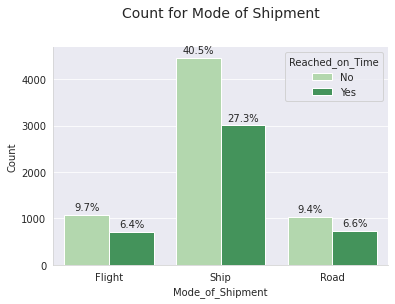

In [ ]:
# plot in %
total = float(len(df)) 

ax = sns.countplot(x="Mode_of_Shipment", data=df, hue='Reached_on_Time', palette="Greens")
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
# settings 
ax.set_ylabel('Count')
ax.set_title('Count for Mode of Shipment', fontsize = 14, pad = 30)

Text(0.5, 1.0, 'Count for Warehouse block')

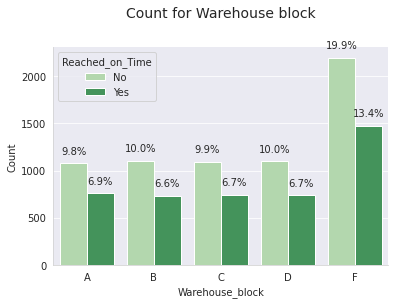

In [ ]:
# plot in %
total = float(len(df)) 

order_list_WH = ['A','B','C','D','F']
ax = sns.countplot(x="Warehouse_block", data=df, hue='Reached_on_Time', palette="Greens", order=order_list_WH)
sns.despine(top=True, right=True, left=False, bottom=False)
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
# settings 
ax.set_ylabel('Count')
ax.set_title('Count for Warehouse block', fontsize = 14, pad = 30)

Text(0.5, 1.0, 'Gender')

findfont: Font family ['Times new roman'] not found. Falling back to DejaVu Sans.


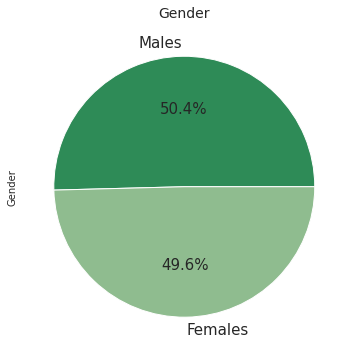

In [ ]:
plt.figure(figsize=[12,6])

my_colors = ['seagreen','darkseagreen']
df['Gender'].value_counts(normalize=True).plot(kind='pie',labels=['Males','Females'],
                                                           fontsize=15,autopct='%1.1f%%', colors=my_colors)
plt.title('Gender',fontname='Times new roman',fontsize=14)

Text(0.5, 1.0, 'Count for Product Importance')

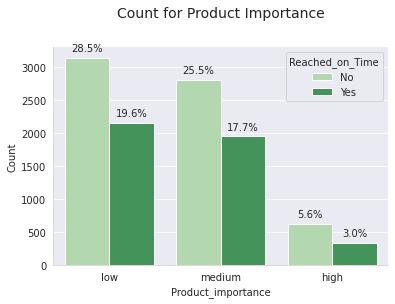

In [ ]:
# plot in %
total = float(len(df)) 

ax = sns.countplot(x="Product_importance", data=df, hue='Reached_on_Time', palette="Greens")
sns.despine(top=True, right=True, left=False, bottom=False);
ax.spines['left'].set_color('lightgray')
ax.spines['bottom'].set_color('lightgray')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{0:.1%}'.format(height/total),
            ha="center", fontsize=10)
    
# settings 
ax.set_ylabel('Count')
ax.set_title('Count for Product Importance', fontsize = 14, pad = 30)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


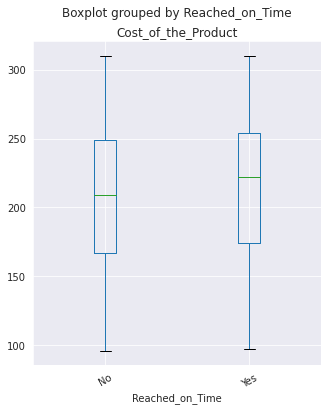

In [ ]:
df.boxplot('Cost_of_the_Product','Reached_on_Time',rot = 30,figsize=(5,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


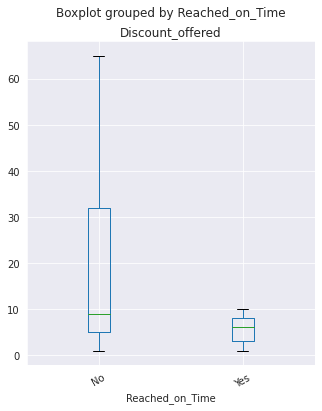

In [ ]:
df.boxplot('Discount_offered','Reached_on_Time',rot = 30,figsize=(5,6))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


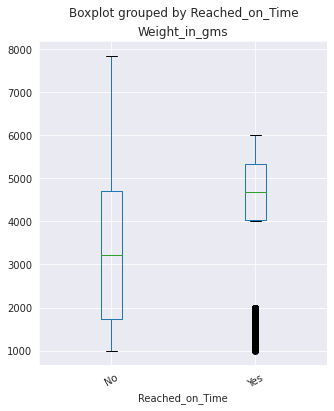

In [ ]:
df.boxplot('Weight_in_gms','Reached_on_Time',rot = 30,figsize=(5,6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


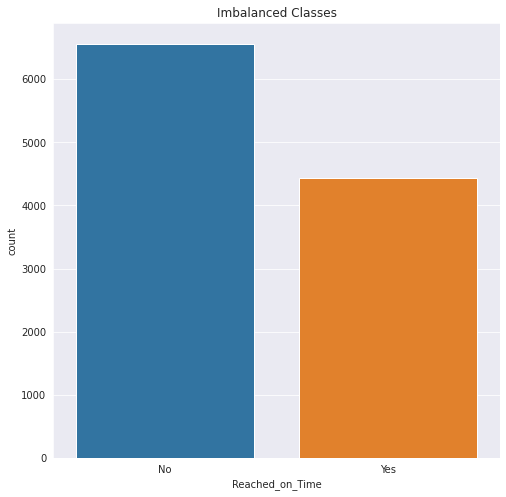

In [ ]:
#Imbalanced Dataset
plt.figure(figsize=(8, 8))
sns.countplot('Reached_on_Time', data=df)
plt.title('Imbalanced Classes')
plt.show()

In [ ]:
df['Reached_on_Time'].value_counts()

No     6563
Yes    4436
Name: Reached_on_Time, dtype: int64

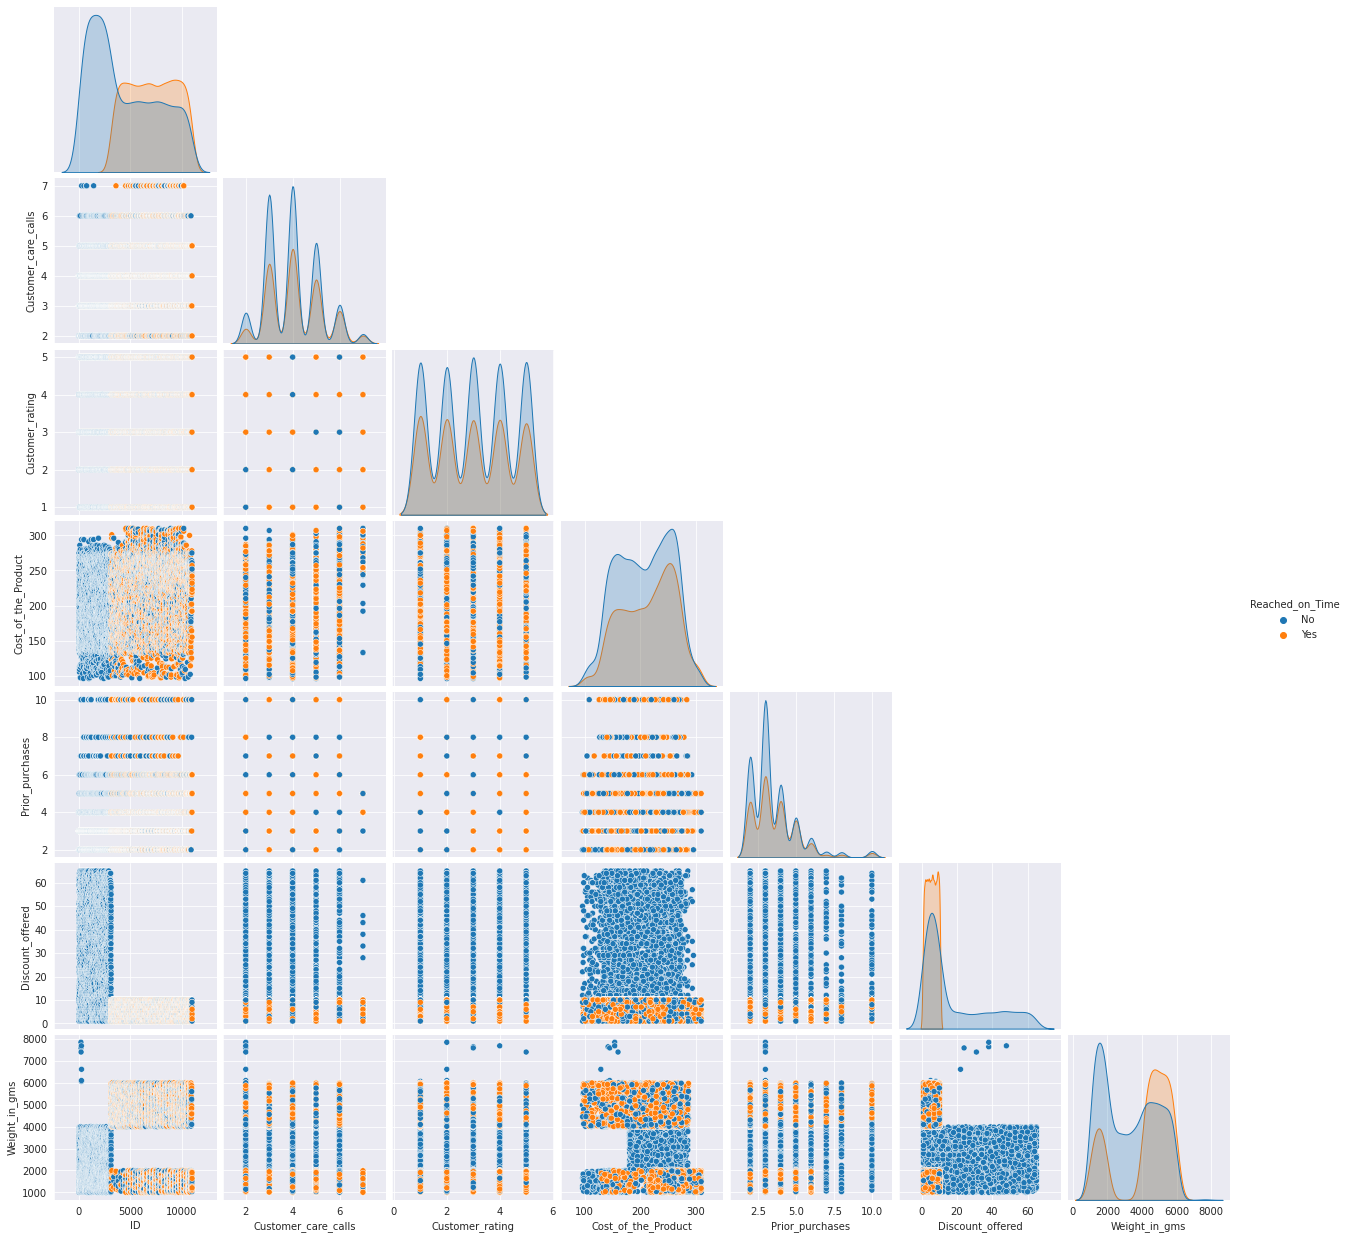

In [ ]:
# Visualize correlations 
corr_plot = sns.pairplot(df, corner=True, hue='Reached_on_Time')

#Balancing dataset

https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5

https://python-bloggers.com/2020/12/how-to-effortlessly-handle-class-imbalance-with-python-and-smote/

In [ ]:
# Drop unnecessary columns
# Since the ID column is unique, we will drop the column
df = df.drop('ID', axis=1)
df = df.drop('Customer_rating', axis=1)

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,177,3,low,F,44,1233,No
1,F,Flight,4,216,2,low,M,59,3088,No
2,A,Flight,2,183,4,low,M,48,3374,No
3,B,Flight,3,176,4,medium,M,10,1177,No
4,C,Flight,2,184,3,medium,F,46,2484,No


In [ ]:
X = df.drop('Reached_on_Time', axis=1)
y = df['Reached_on_Time']

#Import the SMOTE-NC
from imblearn.over_sampling import SMOTENC
#Create the oversampler. For SMOTE-NC we need to pinpoint the column position where is the categorical features are. If you have more than one categorical columns, just input all the columns position
smotenc = SMOTENC(categorical_features=[0,1,5,6], random_state = SEED)
X_sm, y_sm = smotenc.fit_resample(X, y)

#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state=SEED)
#X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10999, 9)
Shape of X after SMOTE: (13126, 9)

Balance of positive and negative classes (%):


Yes    50.0
No     50.0
Name: Reached_on_Time, dtype: float64

In [ ]:
#concat 2 series into dataframe
df =  pd.concat([X_sm, y_sm], axis=1)

In [ ]:
#save in csv
df.to_csv('Oversample.csv', index=False)

In [ ]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,177,3,low,F,44,1233,No
1,F,Flight,4,216,2,low,M,59,3088,No
2,A,Flight,2,183,4,low,M,48,3374,No
3,B,Flight,3,176,4,medium,M,10,1177,No
4,C,Flight,2,184,3,medium,F,46,2484,No
...,...,...,...,...,...,...,...,...,...,...
13121,B,Ship,6,141,3,low,F,3,1173,Yes
13122,F,Ship,3,145,2,medium,M,9,4363,Yes
13123,C,Ship,4,219,4,low,F,5,4095,Yes
13124,D,Ship,4,256,2,medium,M,3,4455,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


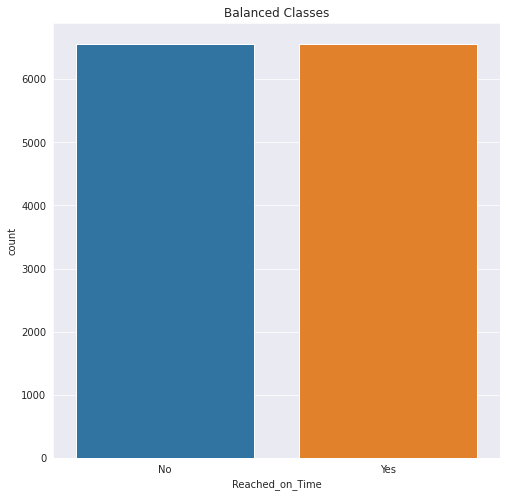

In [ ]:
#plot the dataset after the oversampling
plt.figure(figsize=(8, 8))
sns.countplot('Reached_on_Time', data=df)
plt.title('Balanced Classes')
plt.show()

In [ ]:
df['Reached_on_Time'].value_counts()

Yes    6563
No     6563
Name: Reached_on_Time, dtype: int64

#Defining the data

In [ ]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,177,3,low,F,44,1233,No
1,F,Flight,4,216,2,low,M,59,3088,No
2,A,Flight,2,183,4,low,M,48,3374,No
3,B,Flight,3,176,4,medium,M,10,1177,No
4,C,Flight,2,184,3,medium,F,46,2484,No


#####Ordinal Data

In [ ]:
# Select columns that are ordinal categorical i.e. product importance
X_cat_ord = df[['Product_importance']]

#Check for documentation of Ordinal Encoding https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
#apply Ordinal Encoding accordingly:
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays
X_cat_nom_ord = OrdinalEncoder()
X_cat_ord = X_cat_nom_ord.fit_transform(X_cat_ord)

In [ ]:
#https://www.kite.com/python/answers/how-to-create-pandas-dataframe-from-a-numpy-array-in-python

X_cat_ord = pd.DataFrame(data=X_cat_ord, columns=["Product_importance"])
X_cat_ord = X_cat_ord.sort_index(ascending=True)

In [ ]:
X_cat_ord.head(5)

,Product_importance
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0


In [ ]:
print(type(X_cat_ord))

<class 'pandas.core.frame.DataFrame'>


#####Nominal Data

In [ ]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

Gender ['F' 'M']
Reached_on_Time ['No' 'Yes']


In [ ]:
# Remap to integers
# df['Gender'] = [0 if x == 'M' else 1 for x in df['Gender']]

# Create dummy variables
dummy_Warehouse_block = pd.get_dummies(df['Warehouse_block'], prefix='Warehouse_block')
dummy_Mode_of_Shipment = pd.get_dummies(df['Mode_of_Shipment'], prefix='Mode_of_Shipment')

to_drop = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
# Merge into a single data frame
df = pd.concat([dummy_Warehouse_block, dummy_Mode_of_Shipment, X_cat_ord, df], axis=1)

In [ ]:
df

,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,0,0,0,1,0,1,0,0,1.0,4,177,3,0,44,1233,0
1,0,0,0,0,1,1,0,0,1.0,4,216,2,1,59,3088,0
2,1,0,0,0,0,1,0,0,1.0,2,183,4,1,48,3374,0
3,0,1,0,0,0,1,0,0,2.0,3,176,4,1,10,1177,0
4,0,0,1,0,0,1,0,0,2.0,2,184,3,0,46,2484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13121,0,1,0,0,0,0,0,1,1.0,6,141,3,0,3,1173,1
13122,0,0,0,0,1,0,0,1,2.0,3,145,2,1,9,4363,1
13123,0,0,1,0,0,0,0,1,1.0,4,219,4,0,5,4095,1
13124,0,0,0,1,0,0,0,1,2.0,4,256,2,1,3,4455,1


#Correlation Plot


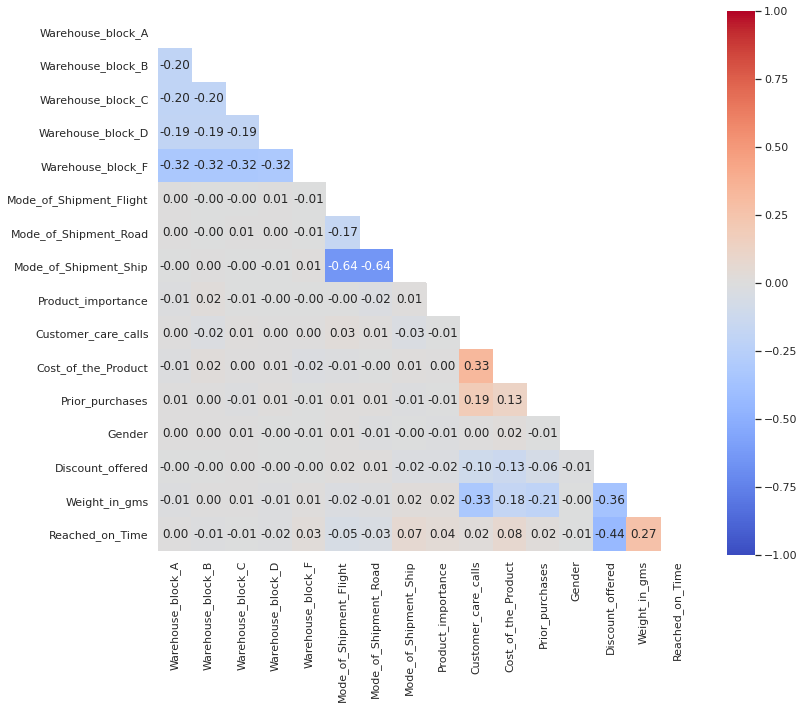

In [ ]:
# how strong the relation between variable 
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(12,10))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 12}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')  # annot=True display corr label

# _ = sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, square=True, 
#                 cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f')

# Prevent Heatmap Cut-Off Issue
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top-0.5)

# Split the data and train the models

In [ ]:
X=df.drop('Reached_on_Time',axis=1)
y=df['Reached_on_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED) #0.20-20% test data

In [ ]:
#train data
#X_train.head(10)
print(len(X_train))

#test data
#X_test.head(10)
print(len(X_test))

10500
2626


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

####Baseline model using Logistic Regression (without hyperparameter)

In [ ]:
logreg = LogisticRegression()

In [ ]:
# K-fold cross validation using F1-score as scorer
scores = cross_val_score(logreg, 
                         X_train_scaled, 
                         y_train, 
                         cv=10, 
                         scoring='f1_macro')
print('F1 scores:', scores)
print('Mean & standard deviation: {:.2} {:.2f}'.format(scores.mean(), np.std(scores)))

F1 scores: [0.67968659 0.68068634 0.70356643 0.66789689 0.67678036 0.67118148
 0.66942996 0.68302373 0.68994336 0.67386602]
Mean & standard deviation: 0.68 0.01


In [ ]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

####Logistic Regression

In [ ]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1, random_state = SEED)

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-2, 2, 5),
              'solver':['newton-cg', 'lbfgs', 'sag','saga']
}
gs_logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=2)
gs_logreg.fit(X_train_scaled, y_train)

CPU times: user 1.62 s, sys: 492 ms, total: 2.11 s
Wall time: 33.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.68090381 0.68318435 0.68318435
 0.68318435 0.68318435        nan        nan        nan        nan
 0.67932288 0.67932288 0.67930367 0.67932288        nan        nan
        nan 0.67970059 0.6802151  0.6802151  0.6802151  0.6802151
        nan        nan        nan        nan 0.67932288 0.67932288
 0.67930367 0.67932288        nan        nan        nan 0.67910804
 0.67960611 0.67960611 0.67949778 0.67960611        nan        nan
        nan        nan 0.67932288 0.67932288 0.67930367 0.67932288
        nan        nan        nan 0.67921538 0.67941118 0.67941118
 0.6793231  0.67941118        nan        nan        nan        nan
 0.67932288 0.67932288 0.67930367 0.67932288        nan        nan
        nan 0.67932288 0.67932288 0.67932288 0.67930367 0.67932288
        nan        nan        nan        nan 0.67932288 0.

In [ ]:
# Best model hyperparameters and score
print(gs_logreg.best_estimator_)
print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

LogisticRegression(C=0.01, n_jobs=-1, random_state=0, solver='newton-cg')
{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6831843450233748


In [ ]:
# Using best estimator found by GridSearchCV
logreg = gs_logreg.best_estimator_
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, n_jobs=-1, random_state=0, solver='newton-cg')

In [ ]:
y_pred = logreg.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1280
           1       0.65      0.87      0.74      1346

    accuracy                           0.69      2626
   macro avg       0.72      0.69      0.68      2626
weighted avg       0.72      0.69      0.68      2626

Confusion Matrix:


array([[ 652,  628],
       [ 180, 1166]])

In [ ]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

### Decison Tree

In [ ]:
# Decision Tree 
dt = DecisionTreeClassifier(random_state=SEED)

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
#'gini', 'entropy'
#optimising the parameter, best value for best model

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 3, 5]}
              
gs_dt = GridSearchCV(dt,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_dt.fit(X_train_scaled, y_train)

CPU times: user 547 ms, sys: 178 ms, total: 725 ms
Wall time: 7.3 s


In [ ]:
# Best model hyperparameters and score
print(gs_dt.best_estimator_)
print(gs_dt.best_params_)
print(gs_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
0.7111511062328878


In [ ]:
# Using best estimator found by GridSearchCV
dt = gs_dt.best_estimator_
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [ ]:
y_pred = dt.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.48      0.64      1280
           1       0.66      0.98      0.79      1346

    accuracy                           0.74      2626
   macro avg       0.82      0.73      0.72      2626
weighted avg       0.81      0.74      0.72      2626

Confusion Matrix:


array([[ 613,  667],
       [  22, 1324]])

In [ ]:
models.append('Decision Tree')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, dt.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

###Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_jobs=-1, random_state = SEED)

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 25]
              }
              
#'min_samples_split': [5, 10, 15]

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=10,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_rf.best_params_, gs_rf.best_score_))

'{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}' gives the best F1-score at: 71.78%
CPU times: user 4.48 s, sys: 442 ms, total: 4.92 s
Wall time: 4min 2s


In [ ]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=0)
{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
0.7177965961206623


In [ ]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=0)

In [ ]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1280
           1       0.67      0.96      0.79      1346

    accuracy                           0.73      2626
   macro avg       0.79      0.73      0.72      2626
weighted avg       0.79      0.73      0.72      2626

Confusion Matrix:


array([[ 641,  639],
       [  57, 1289]])

In [ ]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

### K-nearest neighnors

In [ ]:
# KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
#optimising the parameter, best value for best model

param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
              
gs_KNN = GridSearchCV(KNN,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_KNN.fit(X_train_scaled, y_train)

CPU times: user 477 ms, sys: 164 ms, total: 641 ms
Wall time: 13 s


In [ ]:
# Best model hyperparameters and score
print(gs_KNN.best_estimator_)
print(gs_KNN.best_params_)
print(gs_KNN.best_score_)

KNeighborsClassifier(n_neighbors=10)
{'n_neighbors': 10}
0.7344708305939621


In [ ]:
# Using best estimator found by GridSearchCV
KNN = gs_KNN.best_estimator_
KNN.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = KNN.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      1280
           1       0.66      0.76      0.71      1346

    accuracy                           0.68      2626
   macro avg       0.68      0.67      0.67      2626
weighted avg       0.68      0.68      0.67      2626

Confusion Matrix:


array([[ 754,  526],
       [ 326, 1020]])

In [ ]:
models.append('KNN')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, KNN.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

###LinearSVC- SVM

In [ ]:
# Support Vector Machines
svm = LinearSVC(random_state = SEED, class_weight='balanced')

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
#optimising the parameter, best value for best model

param_grid = {'penalty': ['l1', 'l2'],
              'C': np.logspace(-2, 2, 5)} 

gs_svm = GridSearchCV(svm,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_svm.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.68480121        nan 0.68438469        nan 0.68449507
        nan 0.68508426        nan 0.63165465]
  category=UserWarning


CPU times: user 1.52 s, sys: 117 ms, total: 1.64 s
Wall time: 23.8 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# Best model hyperparameters and score
print(gs_svm.best_estimator_)
print(gs_svm.best_params_)
print(gs_svm.best_score_)

LinearSVC(C=10.0, class_weight='balanced', random_state=0)
{'C': 10.0, 'penalty': 'l2'}
0.685084264444153


In [ ]:
# Using best estimator found by GridSearchCV
svm = gs_svm.best_estimator_
svm.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10.0, class_weight='balanced', random_state=0)

In [ ]:
y_pred = svm.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.51      0.61      1280
           1       0.65      0.86      0.74      1346

    accuracy                           0.69      2626
   macro avg       0.71      0.68      0.68      2626
weighted avg       0.71      0.69      0.68      2626

Confusion Matrix:


array([[ 647,  633],
       [ 184, 1162]])

In [ ]:
models.append('SVM')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, svm.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

###Navie Bayes- GaussianNB()

In [ ]:
# Import the Multinomial Naive Bayes algorithm
# from sklearn.naive_bayes import MultinomialNB
# nb = MultinomialNB()

#Just replace MultinomialNB with GaussianNB (GaussianNB has no alpha parameter), https://www.programmersought.com/article/27433536870/
nb = GaussianNB()

In [ ]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method

#param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
#param_grid = {'priors' : [None], 'var_smoothing' : [1e-09]}
param_grid = { 'priors': [None],
              'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
              }
#param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}   

gs_nb = GridSearchCV(nb,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_nb.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-08]},
             scoring='f1_macro')

In [ ]:
# Best model hyperparameters and score
print(gs_nb.best_estimator_)
print(gs_nb.best_params_)
print(gs_nb.best_score_)

GaussianNB(var_smoothing=1e-08)
{'priors': None, 'var_smoothing': 1e-08}
0.6802910005008624


In [ ]:
# Using best estimator found by GridSearchCV
nb = gs_nb.best_estimator_
nb.fit(X_train_scaled, y_train)

GaussianNB(var_smoothing=1e-08)

In [ ]:
y_pred = nb.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.40      0.57      1280
           1       0.63      0.98      0.77      1346

    accuracy                           0.70      2626
   macro avg       0.79      0.69      0.67      2626
weighted avg       0.79      0.70      0.67      2626



In [ ]:
models.append('Naive Bayes- GaussianNB()')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, nb.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

###Multi-Level Perceptron - Neural Network

In [ ]:
# Multi-Level Perceptron
mlp = MLPClassifier(random_state=SEED)

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'hidden_layer_sizes': [(3,3),
                                     (2),
                                     (3)], 
              'alpha': np.logspace(-4, -1, 4),
              'max_iter': [400, 450, 500, 550]}

gs_mlp = GridSearchCV(mlp,
                      param_grid, 
                      cv=10,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_mlp.fit(X_train_scaled, y_train)

CPU times: user 15.4 s, sys: 1.41 s, total: 16.8 s
Wall time: 23min 52s


In [ ]:
# Best model hyperparameters and score
print(gs_mlp.best_estimator_)
print(gs_mlp.best_params_)
print(gs_mlp.best_score_)

MLPClassifier(alpha=0.1, hidden_layer_sizes=3, max_iter=400, random_state=0)
{'alpha': 0.1, 'hidden_layer_sizes': 3, 'max_iter': 400}
0.6965159517145184


In [ ]:
# Using best estimator found by GridSearchCV
mlp = gs_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=3, max_iter=400, random_state=0)

In [ ]:
y_pred = mlp.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.46      0.61      1280
           1       0.65      0.96      0.78      1346

    accuracy                           0.72      2626
   macro avg       0.78      0.71      0.70      2626
weighted avg       0.78      0.72      0.70      2626

Confusion Matrix:


array([[ 594,  686],
       [  58, 1288]])

In [ ]:
models.append('Multilevel Perceptron')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, mlp.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

##Naive Bayes- Mixed Naive Bayes (Gaussian + Categorical) 

In [ ]:
# ----- Prepare data ----- changing to array form for MixedNB
# Select data for modeling
X_G=df[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']] # Gaussian
X_C=df[['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Gender',
       'Product_importance']] # Categorical
y=df['Reached_on_Time']

In [ ]:
# Combine all 15 variables into one array
# https://stackoverflow.com/questions/55291667/getting-typeerror-slicenone-none-none-0-is-an-invalid-key
X=np.c_[X_G, X_C.iloc[:,0].ravel(), X_C.iloc[:,1].ravel(), X_C.iloc[:,2].ravel(), X_C.iloc[:,3].ravel(), 
        X_C.iloc[:,4].ravel(), X_C.iloc[:,5].ravel(), X_C.iloc[:,6].ravel(), X_C.iloc[:,7].ravel(),
        X_C.iloc[:,8].ravel(), X_C.iloc[:,9].ravel()]

In [ ]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED) #0.20-20% test data

In [ ]:
# ----- Fit the two models ----- this method use array, not dataframe
# Now use the Gaussian model for independent variable and 
model_G = GaussianNB()
clf_G = model_G.fit(X_train[:,0:5], y_train)

# Categorical model for independent variable
model_C = CategoricalNB()
clf_C = model_C.fit(X_train[:,5:15], y_train)

In [ ]:
X_train[:,5:15]

array([[0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 2.],
       [0., 0., 0., ..., 0., 1., 2.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
X_train[:,0:5]

array([[6.000e+00, 2.820e+02, 4.000e+00, 8.000e+00, 1.385e+03],
       [6.000e+00, 2.890e+02, 4.000e+00, 1.000e+00, 1.656e+03],
       [3.000e+00, 1.500e+02, 3.000e+00, 5.000e+00, 4.950e+03],
       ...,
       [4.000e+00, 1.610e+02, 3.000e+00, 3.000e+00, 4.590e+03],
       [4.000e+00, 2.450e+02, 6.000e+00, 2.000e+00, 1.727e+03],
       [4.000e+00, 2.350e+02, 3.000e+00, 1.700e+01, 3.715e+03]])

In [ ]:
# ----- Get probability predictions from each model -----
# https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069
# On training data
G_train_probas = model_G.predict_proba(X_train[:,0:5])
C_train_probas = model_C.predict_proba(X_train[:,5:15])
# And on testing data
G_test_probas = model_G.predict_proba(X_test[:,0:5])
C_test_probas = model_C.predict_proba(X_test[:,5:15])

# Combine probability prediction for class=1 from both models into a 2D array
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test

Scaling

In [ ]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_new_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_new_train)
X_test_scaled = scaler.transform(X_new_test)

In [ ]:
# ----- Fit Gaussian model on the X_new -----
nb1 = GaussianNB()

In [ ]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method

#param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001]}
#param_grid = {'priors' : [None], 'var_smoothing' : [1e-09]}
#param_grid = { 'priors': [None],
              #'var_smoothing': [0.00000001, 0.000000001, 0.00000001]}
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}   

gs_nb1 = GridSearchCV(nb1,
                     param_grid, 
                     cv=10,
                     scoring='f1_macro',
                     n_jobs=-1)
gs_nb1.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro')

In [ ]:
# Best model hyperparameters and score
print(gs_nb1.best_estimator_)
print(gs_nb1.best_params_)
print(gs_nb1.best_score_)

GaussianNB(var_smoothing=0.02310129700083159)
{'var_smoothing': 0.02310129700083159}
0.6879258389745022


In [ ]:
# Using best estimator found by GridSearchCV
nb1 = gs_nb1.best_estimator_
nb1.fit(X_train_scaled, y_train)

GaussianNB(var_smoothing=0.02310129700083159)

In [ ]:
y_pred = nb1.predict(X_test_scaled)

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.45      0.60      1280
           1       0.64      0.94      0.77      1346

    accuracy                           0.70      2626
   macro avg       0.76      0.70      0.68      2626
weighted avg       0.76      0.70      0.68      2626

Confusion Matrix:


array([[ 580,  700],
       [  78, 1268]])

In [ ]:
models.append('Naive Bayes- Mixed Naive Bayes')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, nb1.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

##Model Performance Summary

In [ ]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
2,Random Forest,0.785429,0.734958,0.793453,0.729217,0.717773
1,Decision Tree,0.734286,0.737624,0.815173,0.731281,0.716868
6,Multilevel Perceptron,0.715333,0.716679,0.781763,0.710486,0.695405
7,Naive Bayes- Mixed Naive Bayes,0.705429,0.703732,0.762884,0.697588,0.681897
0,Logistic Regression,0.692762,0.692308,0.716799,0.687823,0.680050
4,SVM,0.693143,0.688880,0.712967,0.684384,0.676436
3,KNN,0.751429,0.675552,0.678958,0.673432,0.672189
5,Naive Bayes- GaussianNB(),0.704857,0.699543,0.792144,0.692314,0.668720


#Predict and Evaluate with the best model

In [ ]:
X=df.drop('Reached_on_Time',axis=1)
y=df['Reached_on_Time']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED) #0.20-20% test data

In [ ]:
#scaling
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Prediction by selected model
y_pred = rf.predict(X_test_scaled)

#predictions = classifier.predict(test_data)

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1280
           1       0.67      0.96      0.79      1346

    accuracy                           0.73      2626
   macro avg       0.79      0.73      0.72      2626
weighted avg       0.79      0.73      0.72      2626



Text(30.5, 0.5, 'Predicted')

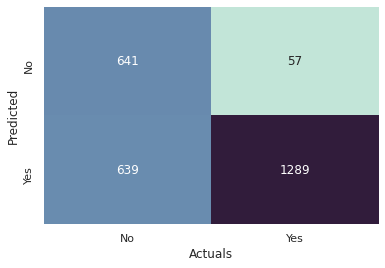

In [ ]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [ ]:
# Kept aside some data to test - X_test
y_pred = rf.predict(X_test_scaled)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [ ]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
4075,1,1
397,0,0
11135,1,1
11920,1,1
11661,1,1
2894,0,0
6648,1,1
8133,1,1
3861,0,1
2976,0,0


In [ ]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
3861,0,1
4495,0,1
8640,0,1
6623,0,1
9093,0,1
10970,1,0
5404,0,1
5710,0,1
10434,1,0
4398,0,1


###Future Prediction

In [ ]:
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = rf.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is a : " + str(own_pred))
print("This was the input data:")
print(my_features)

My prediction is a : [0]
This was the input data:
Warehouse_block_A             0.0
Warehouse_block_B             0.0
Warehouse_block_C             0.0
Warehouse_block_D             0.0
Warehouse_block_F             1.0
Mode_of_Shipment_Flight       0.0
Mode_of_Shipment_Road         0.0
Mode_of_Shipment_Ship         1.0
Product_importance            1.0
Customer_care_calls           3.0
Cost_of_the_Product         137.0
Prior_purchases               3.0
Gender                        1.0
Discount_offered              3.0
Weight_in_gms              5928.0
Name: 12605, dtype: float64


#Get and plot features importance
After training the model, using the best classification model for coeficient to see what is important

In [ ]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

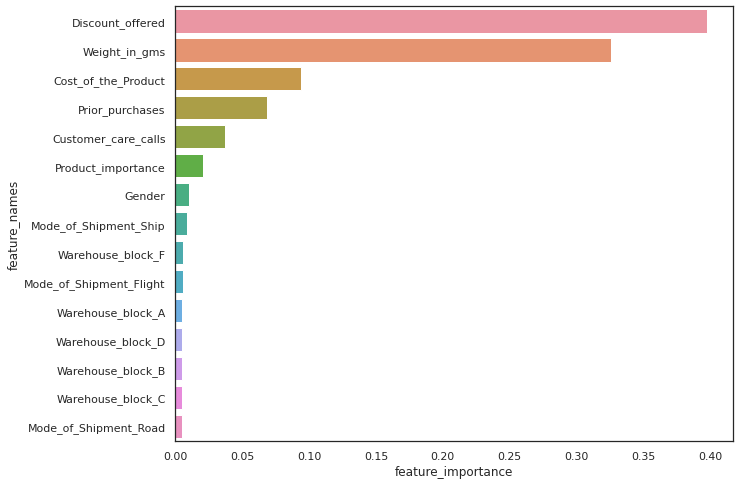

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

#Remove column for Feature selection

Using Random forest model, dropping columns except for discount offered, weight, prior_purchases, cost_of_the_product, customer_care_calls, 'Product Importance'

In [ ]:
columns = ['Warehouse_block_A', 'Warehouse_block_B', 'Warehouse_block_C',
       'Warehouse_block_D', 'Warehouse_block_F', 'Mode_of_Shipment_Flight',
       'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Reached_on_Time',
       'Gender']
X= df.drop(columns, axis=1)

In [ ]:
y=df['Reached_on_Time']

In [ ]:
X

,Product_importance,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,1.0,4,177,3,44,1233
1,1.0,4,216,2,59,3088
2,1.0,2,183,4,48,3374
3,2.0,3,176,4,10,1177
4,2.0,2,184,3,46,2484
...,...,...,...,...,...,...
13121,1.0,6,141,3,3,1173
13122,2.0,3,145,2,9,4363
13123,1.0,4,219,4,5,4095
13124,2.0,4,256,2,3,4455


###Split Data and Train the model

In [ ]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED) #0.20-20% test data

In [ ]:
#scaling
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

###Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_jobs=-1, random_state = SEED)

In [ ]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 25]
              }
              
#'min_samples_split': [5, 10, 15]

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=10,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)
print("'{}' gives the best F1-score at: {:.2%}".format(gs_rf.best_params_, gs_rf.best_score_))

'{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}' gives the best F1-score at: 71.77%
CPU times: user 5.59 s, sys: 738 ms, total: 6.32 s
Wall time: 6min 12s


In [ ]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=-1,
                       random_state=0)
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
0.7176704585148681


In [ ]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_jobs=-1,
                       random_state=0)

In [ ]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.49      0.64      1280
           1       0.67      0.98      0.79      1346

    accuracy                           0.74      2626
   macro avg       0.81      0.73      0.72      2626
weighted avg       0.81      0.74      0.72      2626



Text(30.5, 0.5, 'Predicted')

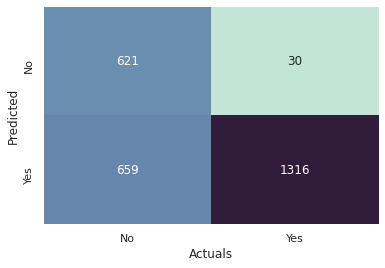

In [ ]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

In [ ]:
# Kept aside some data to test - X_test
y_pred = rf.predict(X_test_scaled)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [ ]:
compare_df[:10]

,Desired Output (Actuals),Predicted Output
4075,1,1
397,0,0
11135,1,1
11920,1,1
11661,1,1
2894,0,0
6648,1,1
8133,1,1
3861,0,1
2976,0,0


In [ ]:
# List out the first twenty or less missed predictions
compared_bool = compare_df['Desired Output (Actuals)'] != compare_df['Predicted Output']
df_missed = compare_df[compared_bool]
df_missed[:10]

,Desired Output (Actuals),Predicted Output
3861,0,1
4495,0,1
8640,0,1
6623,0,1
9093,0,1
5404,0,1
5710,0,1
4398,0,1
6366,0,1
6680,0,1


###Final Model Performance

In [ ]:
models.append('Random Forest After Feature Impt')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [ ]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
model_metrics.sort_values(by='F1 Score', ascending=False)


,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
8,Random Forest After Feature Impt,0.736095,0.737624,0.810123,0.731434,0.717861
2,Random Forest,0.785429,0.734958,0.793453,0.729217,0.717773
1,Decision Tree,0.734286,0.737624,0.815173,0.731281,0.716868
6,Multilevel Perceptron,0.715333,0.716679,0.781763,0.710486,0.695405
7,Naive Bayes- Mixed Naive Bayes,0.705429,0.703732,0.762884,0.697588,0.681897
0,Logistic Regression,0.692762,0.692308,0.716799,0.687823,0.680050
4,SVM,0.693143,0.688880,0.712967,0.684384,0.676436
3,KNN,0.751429,0.675552,0.678958,0.673432,0.672189
5,Naive Bayes- GaussianNB(),0.704857,0.699543,0.792144,0.692314,0.668720


###Feature Impt

In [ ]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

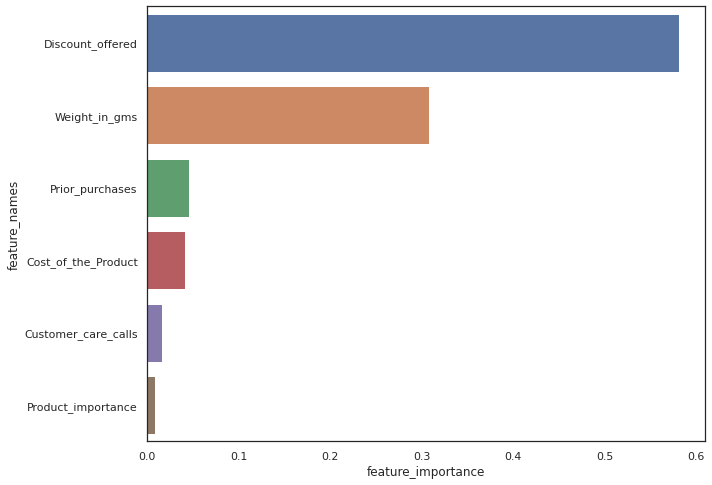

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

###Future Prediction

In [ ]:
my_features = X_test.iloc[np.random.randint(0, len(X_test))]
own_pred = rf.predict(my_features.to_numpy().reshape(1,-1))
print("My prediction is a : " + str(own_pred))
print("This was the input data:")
print(my_features)


My prediction is a : [0]
This was the input data:
Product_importance        1.0
Customer_care_calls       4.0
Cost_of_the_Product     268.0
Prior_purchases           3.0
Discount_offered          8.0
Weight_in_gms          5486.0
Name: 7041, dtype: float64
